Ключевая задача - это провести разведочный анализ данных датасета более 2000 клиентов, дать бизнесу рекомендации по продвижению своего продукта на данную аудиторию, обнаружить паттерны или зависимости между поведением клиентов.

Датасет взят с сайта kaggle: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Поля датасета: https://docs.google.com/spreadsheets/d/15WBSp8ItjS9f_r8vbzRxUH6KVOovVUYPqKzXbg2KnoM/edit?usp=sharing

In [2]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
%matplotlib inline
import seaborn as sns

#уберем warning'и на всякий случай
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
#Посмотрим на наши данные
data = pd.read_csv("marketing_campaign.csv", sep=";")
print(data.shape)
data.head(5)

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04.09.2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08.03.2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#посмотрим на пропущенные значения
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
#посмотрим на описательные статистики
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
#посмтрим на типы данных датасета
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

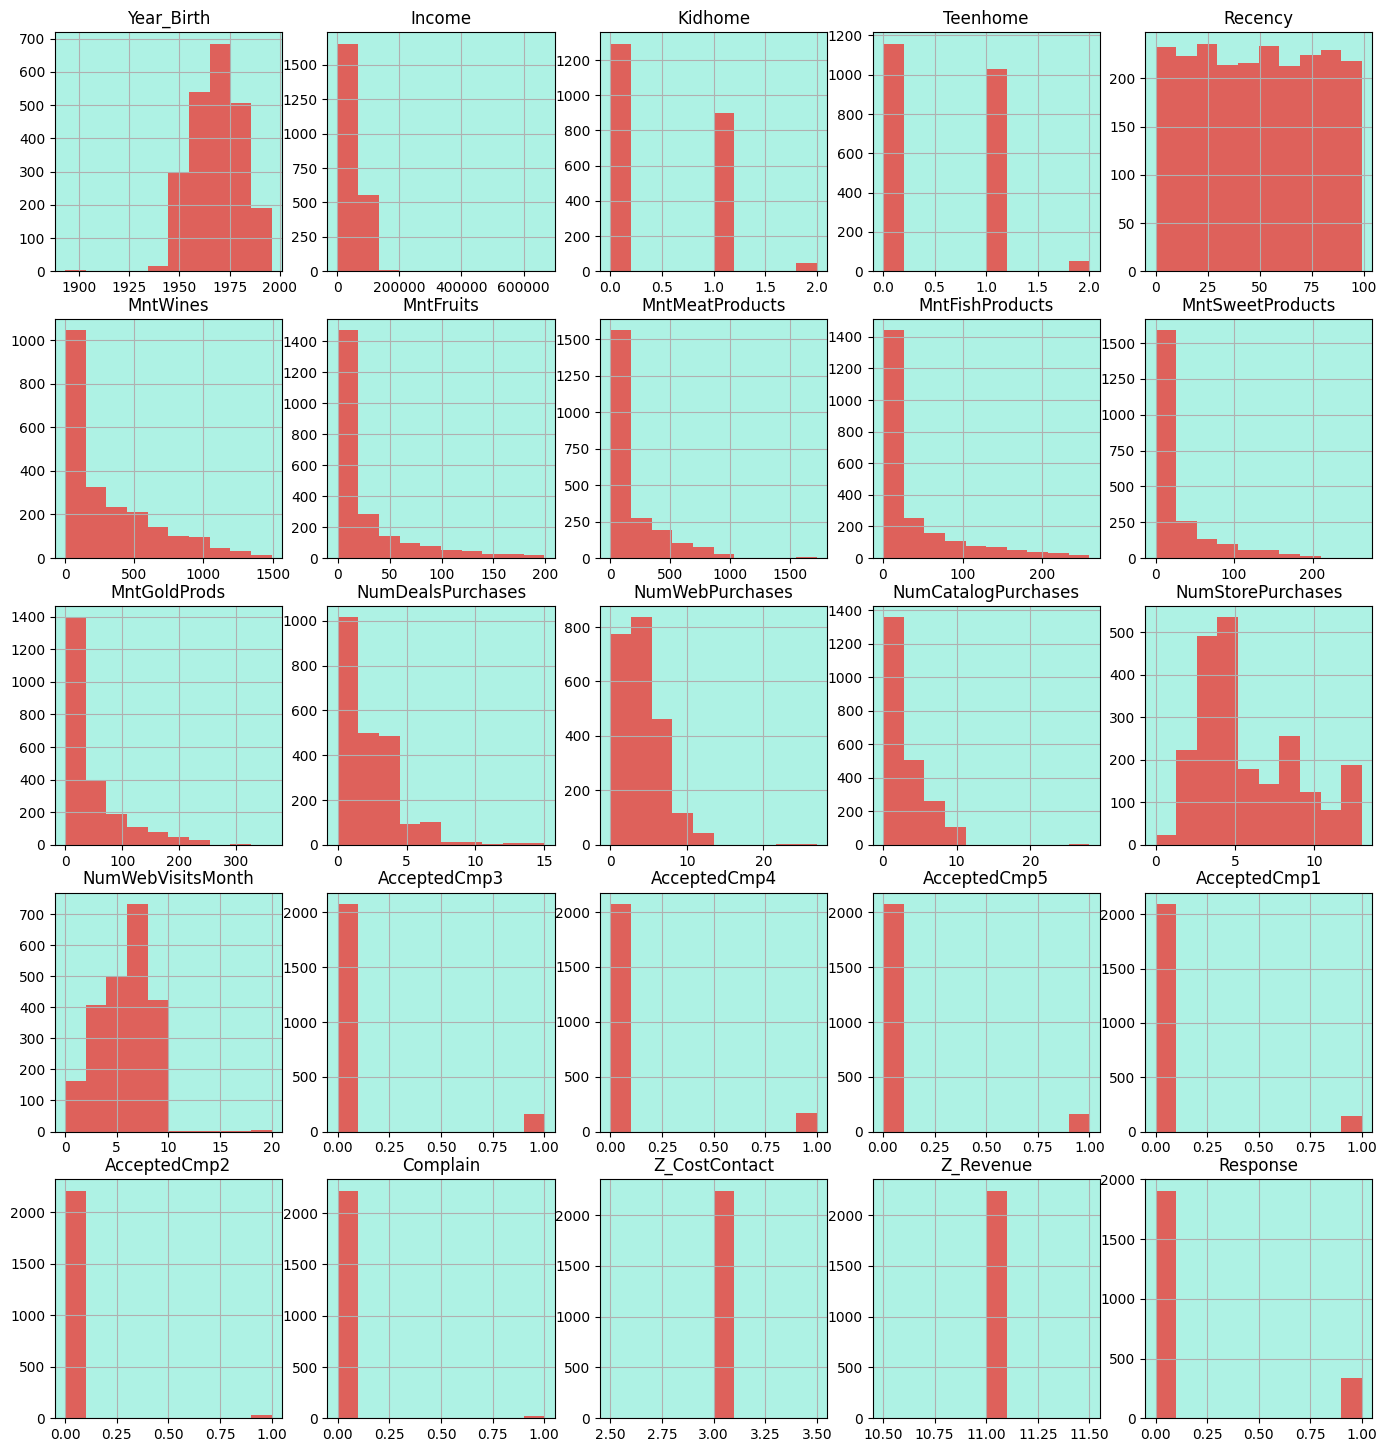

In [7]:
#посмотрим на распределение данных
fig, axes = plt.subplots(5, 5, figsize=(17, 18))

data_hist = data.drop(['ID', 'Education', 'Marital_Status', 'Dt_Customer'], axis=1)
column_list = list(data_hist.columns)

for item, col in enumerate(column_list):
  if item <= 4:
      axes[0][item].set_title(col)
      axes[0][item].hist(data_hist[col], color='red', alpha=0.6)
      axes[0][item].grid()
      axes[0][item].set_facecolor("#aef2e4")
  elif item >= 5 and item <= 9:
      axes[1][item-5].set_title(col)
      axes[1][item-5].hist(data_hist[col], color='red', alpha=0.6)
      axes[1][item-5].grid()
      axes[1][item-5].set_facecolor("#aef2e4")
  elif item >= 10 and item <= 14:
      axes[2][item-10].set_title(col)
      axes[2][item-10].hist(data_hist[col], color='red', alpha=0.6)
      axes[2][item-10].grid()
      axes[2][item-10].set_facecolor("#aef2e4")
  elif item >= 15 and item <= 19:
      axes[3][item-15].set_title(col)
      axes[3][item-15].hist(data_hist[col], color='red', alpha=0.6)
      axes[3][item-15].grid()
      axes[3][item-15].set_facecolor("#aef2e4")
  elif item >= 20 and item <= 24:
      axes[4][item-20].set_title(col)
      axes[4][item-20].hist(data_hist[col], color='red', alpha=0.6)
      axes[4][item-20].grid()
      axes[4][item-20].set_facecolor("#aef2e4")

In [8]:
def normal_test(data):
  """Функция проверяет распределенеи на нормальность и возвращает результат"""
  stat, p = normaltest(data)
  if p > 0.05:
    return f"Распределение нормальное; p = {p}"
  else:
    return f"Распределение не нормальное; p = {p}"

In [9]:
result_dict_normal = {}

for col in list(data_hist.columns):
  result_dict_normal[col] = normal_test(data_hist[col])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


In [10]:
#Нет ни одной переменной у которой распределение нормальное
result_dict_normal

{'Year_Birth': 'Распределение не нормальное; p = 3.7068253792561464e-16',
 'Income': 'Распределение не нормальное; p = nan',
 'Kidhome': 'Распределение не нормальное; p = 1.5597820540214293e-65',
 'Teenhome': 'Распределение не нормальное; p = 4.537527975926156e-114',
 'Recency': 'Распределение не нормальное; p = 0.0',
 'MntWines': 'Распределение не нормальное; p = 9.244605465025573e-79',
 'MntFruits': 'Распределение не нормальное; p = 4.274070593294597e-200',
 'MntMeatProducts': 'Распределение не нормальное; p = 2.0717194512805043e-211',
 'MntFishProducts': 'Распределение не нормальное; p = 3.5771044199510795e-175',
 'MntSweetProducts': 'Распределение не нормальное; p = 6.20647431069622e-206',
 'MntGoldProds': 'Распределение не нормальное; p = 2.96754260670446e-177',
 'NumDealsPurchases': 'Распределение не нормальное; p = 1.7149796915412566e-260',
 'NumWebPurchases': 'Распределение не нормальное; p = 4.12491054247443e-153',
 'NumCatalogPurchases': 'Распределение не нормальное; p = 4.80

<ipython-input-11-00234d37c6e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

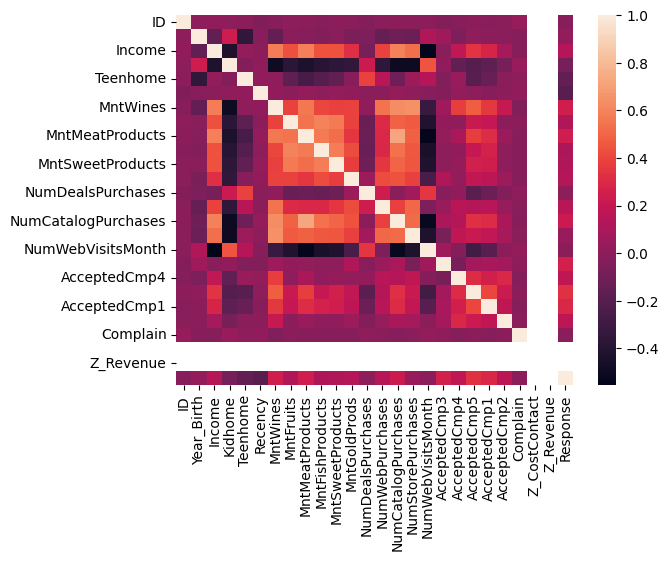

In [11]:
#построим матрицу корреляций
sns.heatmap(data.corr())

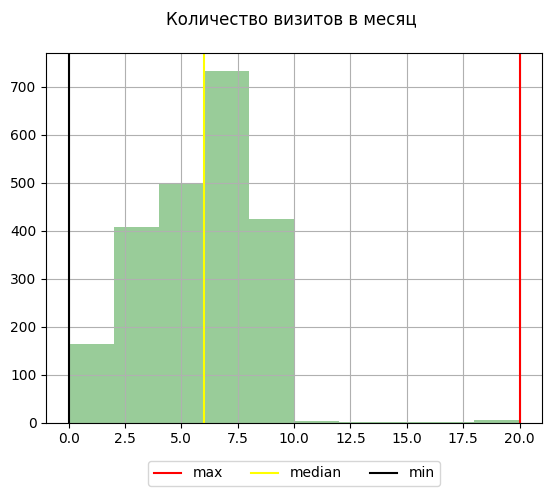

In [12]:
#Посмотрим какая категория клиентов посещает сайт чаще всего

max_num = data['NumWebVisitsMonth'].max()
median_num = data['NumWebVisitsMonth'].median()
mode_num = data['NumWebVisitsMonth'].mode()
min_num = data['NumWebVisitsMonth'].min()

plt.title("Количество визитов в месяц \n")
plt.hist(data['NumWebVisitsMonth'], color="green", alpha=0.4)
plt.axvline(x = max_num, color = 'red', label = 'max')
plt.axvline(x = median_num, color = 'yellow', label = 'median')
plt.axvline(x = min_num, color = 'black', label = 'min')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.19))
plt.grid()

Видно, что максимальное количество визитов сайта у одного пользователя составляет 20, эту категорию пользователей можно отнести к горячему сегменту. Медиана - 6, эту категорию пользователей можно отнести к лояльному сегменту пользователей. Минимальное значение равно 0, эту категорию пользователей можно отнести к холодному сегменту. Посмотрим на самих пользователей, которые принадлежат к этим сегментам.

Итог:

1. 20 посещений = горячий сегмент

2. 6 посещений = лояльный сегмент

3. 0 посещений = холодный сегмент

In [13]:
data_hot_clients = data[data['NumWebVisitsMonth'] == 20]
data_hot_clients.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
9,5899,1950,PhD,Together,5648.0,1,1,13.03.2014,68,28,...,20,1,0,0,0,0,0,3,11,0
774,4303,1957,PhD,Together,6835.0,0,1,08.12.2012,76,107,...,20,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,18.05.2014,65,1,...,20,0,0,0,0,0,0,3,11,0


Портрет горячего сегмента можно описать следующим образом:

1. Примем текущий год анализа данных, тогда средний возраст ~50-60 лет
2. Образования - PhD
3. Средний доход ~4.500 руб.
4. Тратят на вино > 50 у.е.
5. Не используют скидки

In [15]:
data_loal_clients = data[data['NumWebVisitsMonth'] == 6]
data_loal_clients

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,...,6,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09.09.2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13.11.2012,34,235,...,6,0,0,0,0,0,0,3,11,0
13,8180,1952,Master,Divorced,59354.0,1,1,15.11.2013,53,233,...,6,0,0,0,0,0,0,3,11,0
19,2278,1985,2n Cycle,Single,33812.0,1,0,03.11.2012,86,4,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,1876,1990,Graduation,Married,18929.0,0,0,16.02.2013,15,32,...,6,0,0,0,0,0,0,3,11,0
2208,3850,1963,Basic,Together,14918.0,0,1,07.12.2012,52,3,...,6,0,0,0,0,0,0,3,11,0
2215,692,1954,Graduation,Together,36807.0,1,1,20.12.2012,88,4,...,6,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02.06.2013,23,9,...,6,0,0,0,0,0,0,3,11,0


In [73]:
year_loal = np.array(list(data_loal_clients['Income']))
sum_year = 0

for item in year_loal:
  try:
    sum_year += int(item)
  except:
    continue

avg_income = sum_year / len(year_loal)
print(f"Средний доход у клиентов = {avg_income}")

Средний доход у клиентов = 48027.07352941176


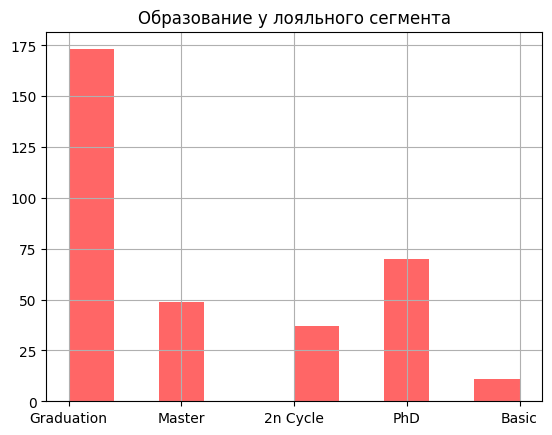

In [76]:
plt.title("Образование у лояльного сегмента")
plt.hist(data_loal_clients['Education'], color="red", alpha=0.6)
plt.grid()

In [82]:
mntwines = np.array(list(data_loal_clients['MntWines']))
sum_mntwines = 0

for item in mntwines:
  sum_mntwines += item

print(f"В среднем лояльный сегмент тратит {sum_mntwines/len(mntwines)} у. е.")

В среднем лояльный сегмент тратит 300.2352941176471 у. е.


'Распределение не нормальное; p = 0.0036376756502141845'

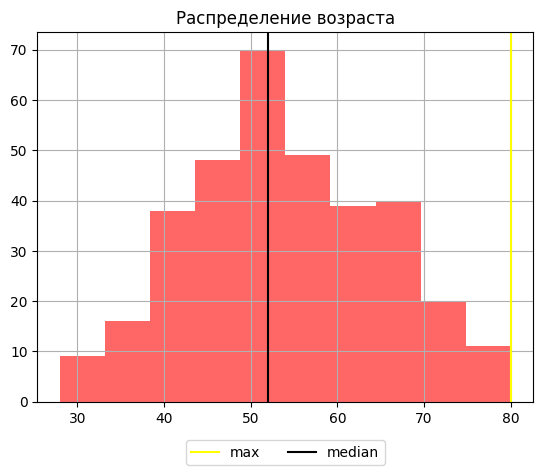

In [56]:
years_list = list(data_loal_clients['Year_Birth'])
year_loal_client = 2023 - np.array(years_list)

plt.axvline(x = year_loal_client.max(), color = 'yellow', label = 'max')
plt.axvline(x = np.median(year_loal_client), color = 'black', label = 'median')

plt.title("Распределение возраста")
plt.hist(year_loal_client, color="red", alpha=0.6)
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.19))
plt.grid()

normal_test(year_loal_client)

Лояльный сегмент:

1. Возраст 55 лет
2. Образование от школы
3. Тратит по 300 у. е. в месяц на вино
4. Бывает берут товар по скидке

In [16]:
data_cold_clients = data[data['NumWebVisitsMonth'] == 0]
data_cold_clients

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,01.03.2014,98,20,...,0,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07.02.2014,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04.08.2012,21,55,...,0,0,0,0,0,0,0,3,11,0
905,11074,1977,Graduation,Single,85072.0,0,0,09.04.2014,94,494,...,0,0,0,0,0,0,0,3,11,0
975,10286,1962,Graduation,Married,83715.0,0,0,03.02.2014,2,318,...,0,0,0,0,0,0,0,3,11,0
1773,8584,1952,PhD,Together,85431.0,0,0,08.06.2013,54,376,...,0,0,0,0,0,0,0,3,11,0
1806,6237,1966,PhD,Single,7144.0,0,2,07.12.2013,92,81,...,0,0,0,0,0,0,0,3,11,0
1910,5832,1960,2n Cycle,Together,92556.0,0,0,20.04.2014,32,493,...,0,0,0,0,0,0,0,3,11,0
1955,6428,1950,PhD,Widow,76842.0,0,0,03.05.2014,37,605,...,0,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29.08.2013,85,2,...,0,0,0,0,0,0,0,3,11,0


'Распределение нормальное; p = 0.25951967602835735'

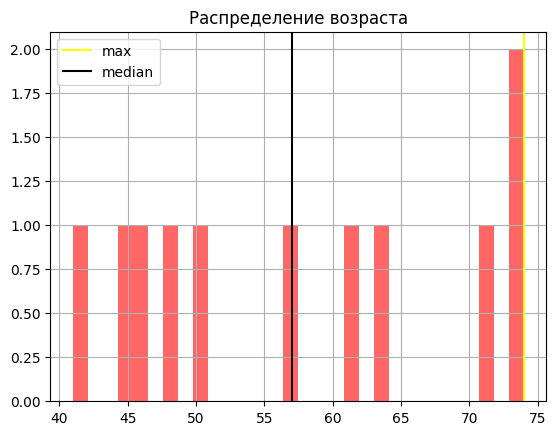

In [40]:
years_list = list(data_cold_clients['Year_Birth'])
year_loal_client = 2023 - np.array(years_list)

plt.axvline(x = year_loal_client.max(), color = 'yellow', label = 'max')
plt.axvline(x = np.median(year_loal_client), color = 'black', label = 'median')

plt.title("Распределение возраста")
plt.hist(year_loal_client, color="red", bins=30, alpha=0.6)
plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.19))
plt.grid()
plt.legend()

normal_test(year_loal_client)

In [88]:
data_year = 2023 - np.array(list(data_cold_clients['Year_Birth']))
round(data_year.mean())

57

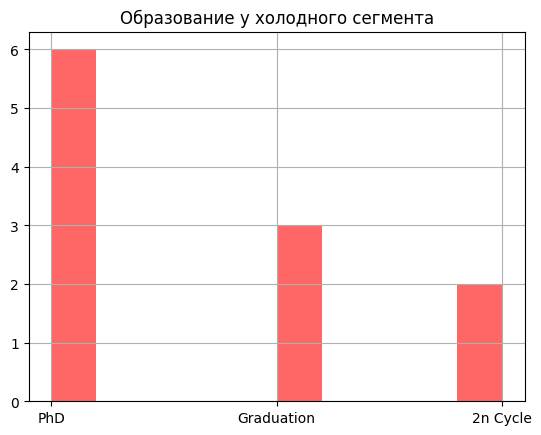

In [90]:
plt.title("Образование у холодного сегмента")
plt.hist(data_cold_clients['Education'], color='red', alpha=0.6)
plt.grid()

In [92]:
f"Тратит в месяц на вино~ {np.array(list(data_cold_clients['MntWines'])).mean()}"

'Тратит в месяц на вино~ 225.1818181818182'

Холодный сегмент:
1. Средней возраст ~ 57 лет
2. Образование = PhD
3. Тратит в месяц на вино примерно 225
4. Не берут товар по скидке

Так как компания скорее всего будет позиционироваться для горячего и лояльного сегмента -> попробуем исследовать их поведение более подробно

Так мы можем посмотреть потенциальное значения NPS для бизнеса

In [103]:
data_loal_clients

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,...,6,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09.09.2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13.11.2012,34,235,...,6,0,0,0,0,0,0,3,11,0
13,8180,1952,Master,Divorced,59354.0,1,1,15.11.2013,53,233,...,6,0,0,0,0,0,0,3,11,0
19,2278,1985,2n Cycle,Single,33812.0,1,0,03.11.2012,86,4,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,1876,1990,Graduation,Married,18929.0,0,0,16.02.2013,15,32,...,6,0,0,0,0,0,0,3,11,0
2208,3850,1963,Basic,Together,14918.0,0,1,07.12.2012,52,3,...,6,0,0,0,0,0,0,3,11,0
2215,692,1954,Graduation,Together,36807.0,1,1,20.12.2012,88,4,...,6,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02.06.2013,23,9,...,6,0,0,0,0,0,0,3,11,0


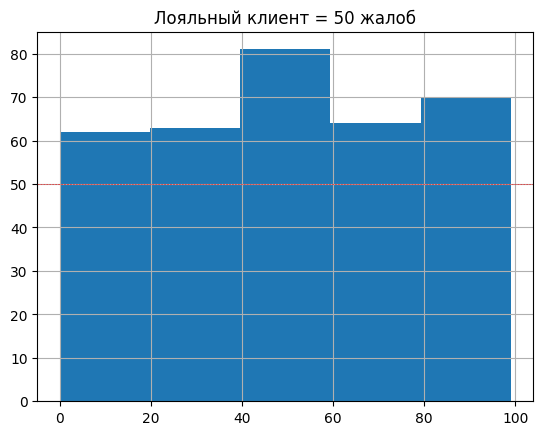

In [116]:
plt.title(f"Лояльный клиент = {round(50.01470588235294)} жалоб")
plt.hist(data_loal_clients["Recency"], bins=5)
plt.axhline(y=np.array(data_loal_clients["Recency"]).mean(), ls="--", linewidth=0.4, color='red')
plt.grid()

In [104]:
data_hot_clients

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
9,5899,1950,PhD,Together,5648.0,1,1,13.03.2014,68,28,...,20,1,0,0,0,0,0,3,11,0
774,4303,1957,PhD,Together,6835.0,0,1,08.12.2012,76,107,...,20,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,18.05.2014,65,1,...,20,0,0,0,0,0,0,3,11,0


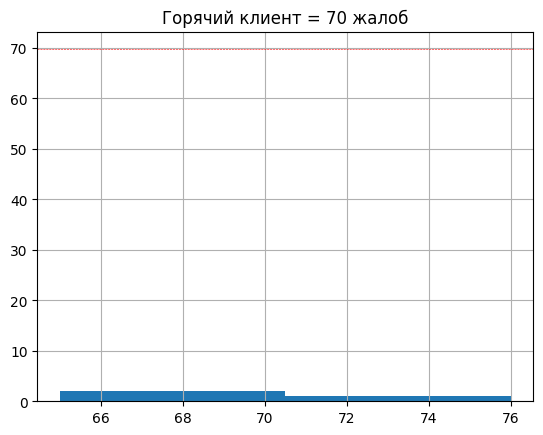

In [119]:
plt.title(f"Горячий клиент = {round(69.66666666666667)} жалоб")
plt.hist(data_hot_clients["Recency"], bins=2)
plt.axhline(y=np.array(data_hot_clients["Recency"]).mean(), ls="--", linewidth=0.4, color='red')
plt.grid()

Мы видим, что в среднем горячие клиенты оставляют больше жалоб, чем лояльные клиенты. Мы не можем говорить это со 100% вероятностью, так как выборка у горячих клиентов не репрезентативна.

В качестве вывода, при условии, что последнее утвержденее верно, бизнесу лучше всего вкладываться в лояьных клиентов.